<a href="https://colab.research.google.com/github/daviesf/DAD/blob/main/Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2: Visualização de Dados

> Por Davie Schimidt Fonseca para a disciplina SI101

Este conjunto de dados contém informações sobre vendas em um supermercado, **esta foi a mesma base usada na atividade anterior** incluindo detalhes sobre os produtos, clientes, transações e preços. Faremos uma análise do arquivo usando a biblioteca pandas.

Vamos iniciar com a importação do arquivo, armazenando suas informações na variável `df`.

In [ ]:
import pandas as pd

df = pd.read_csv('supermarket_sales.csv')

E vamos conhecer nossa base de dados:

In [ ]:
df.head()

,ID Fatura,Filial,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unitário,Quantidade,Imposto 5%,Total,Data,Hora,Pagamento,COGS,Margem Bruta %,Renda Bruta,Avaliação
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID Fatura       1000 non-null   object  
 1   Filial          1000 non-null   object  
 2   Cidade          1000 non-null   object  
 3   Tipo Cliente    1000 non-null   category
 4   Gênero          1000 non-null   category
 5   Linha Produto   1000 non-null   object  
 6   Preço Unitário  1000 non-null   float64 
 7   Quantidade      1000 non-null   int64   
 8   Imposto 5%      1000 non-null   float64 
 9   Total           1000 non-null   float64 
 10  Data            1000 non-null   object  
 11  Hora            1000 non-null   object  
 12  Pagamento       1000 non-null   category
 13  COGS            1000 non-null   float64 
 14  Margem Bruta %  1000 non-null   float64 
 15  Renda Bruta     1000 non-null   float64 
 16  Avaliação       1000 non-null   float64 
dtypes: category(3),

E verificamos possíveis correlações entre os dados:

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

correlation_matrix

,Preço Unitário,Quantidade,Imposto 5%,Total,COGS,Margem Bruta %,Renda Bruta,Avaliação
Preço Unitário,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantidade,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Imposto 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Margem Bruta %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Renda Bruta,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Avaliação,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


O que nos permite ver a correlação entre algumas colunas em específico, como:

- A coluna "Preço Unitário" parece ter uma correlação moderada com as colunas "Imposto 5%", "Total", "COGS" e "Renda Bruta". Isso sugere que o preço unitário influencia nessas colunas.

- A coluna "Quantidade" tem uma correlação moderada a alta com as colunas "Imposto 5%", "Total", "COGS" e "Renda Bruta". Isso sugere que a quantidade de itens vendidos está positivamente correlacionada com essas variáveis. Aparentemente, quanto maior a quantidade, maior é o total, e consequentemente, impostos e relacionados.

- A coluna avaliação não se relaciona com nenhuma coluna propriamente.

## Tratamento dos dados

Antes de explorar os dados, precisamos tratá-los e adaptá-los para que nossa análise seja mais proveitosa.

O tratamento de dados será o mesmo da atividade anterior, pois o arquivo usado é o anterior às alterações e precisa do tratamento.

Vamos exibir quais são as colunas desse dataframe e em seguida, renomear as colunas em português para um melhor entendimento e tratamento, e exibindo-as em seguida.

In [ ]:
print(df.columns)

df = df.rename(columns={
    'Invoice ID': 'ID Fatura',
    'Branch': 'Filial',
    'City': 'Cidade',
    'Customer type': 'Tipo Cliente',
    'Gender': 'Gênero',
    'Product line': 'Linha Produto',
    'Unit price': 'Preço Unitário',
    'Quantity': 'Quantidade',
    'Tax 5%': 'Imposto 5%',
    'Total': 'Total',
    'Date': 'Data',
    'Time': 'Hora',
    'Payment': 'Pagamento',
    'cogs': 'COGS',  # COGS é o custo dos bens vendidos, abreviação em inglês
    'gross margin percentage': 'Margem Bruta %',
    'gross income': 'Renda Bruta',
    'Rating': 'Avaliação'
})

print("\n")
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


Index(['ID Fatura', 'Filial', 'Cidade', 'Tipo Cliente', 'Gênero',
       'Linha Produto', 'Preço Unitário', 'Quantidade', 'Imposto 5%', 'Total',
       'Data', 'Hora', 'Pagamento', 'COGS', 'Margem Bruta %', 'Renda Bruta',
       'Avaliação'],
      dtype='object')



Ainda no tratamento de dados, vamos verificar se temos campos vazios.

In [ ]:
df.isnull().sum()


ID Fatura         0
Filial            0
Cidade            0
Tipo Cliente      0
Gênero            0
Linha Produto     0
Preço Unitário    0
Quantidade        0
Imposto 5%        0
Total             0
Data              0
Hora              0
Pagamento         0
COGS              0
Margem Bruta %    0
Renda Bruta       0
Avaliação         0
dtype: int64

Conforme já constatado na atividade anterior, não temos nenhuma linha com algum campo vazio ou nulo.

Agora vamos converter alguns campos para que possamos fazer análises mais eficazes.

In [ ]:
df['Gênero'] = df['Gênero'].astype('category')
df['Tipo Cliente'] = df['Tipo Cliente'].astype('category')
df['Pagamento'] = df['Pagamento'].astype('category')

df.head()

,ID Fatura,Filial,Cidade,Tipo Cliente,Gênero,Linha Produto,Preço Unitário,Quantidade,Imposto 5%,Total,Data,Hora,Pagamento,COGS,Margem Bruta %,Renda Bruta,Avaliação
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Os campos de **margem bruta, imposto 5% e renda bruta** não estão arredondados para duas casas após a vírgula, e faremos isso para uma análise mais facilitada.

In [ ]:
df['Margem Bruta %'] = df['Margem Bruta %'].round(2)
df['Renda Bruta'] = df['Renda Bruta'].round(2)
df['Imposto 5%'] = df['Imposto 5%'].round(2)


df[['Margem Bruta %', 'Renda Bruta', 'Imposto 5%']].head()

,Margem Bruta %,Renda Bruta,Imposto 5%
0,4.76,26.14,26.14
1,4.76,3.82,3.82
2,4.76,16.22,16.22
3,4.76,23.29,23.29
4,4.76,30.21,30.21


Iremos criar uma coluna nova, unindo os campos de dia e hora, para uma melhor análise:

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M')
df['Data Hora'] = df['Data'] + pd.to_timedelta(df['Hora'].dt.strftime('%H:%M:%S'))

df = df.drop(columns=['Data', 'Hora']) # Excluir as colunas originais.

df['Data Hora'].head()

0   2019-01-05 13:08:00
1   2019-03-08 10:29:00
2   2019-03-03 13:23:00
3   2019-01-27 20:33:00
4   2019-02-08 10:37:00
Name: Data Hora, dtype: datetime64[ns]

## Análise Exploratória

Neste tópico, faremos análises exploratórias e extrair insights do conjunto de dados através de gráficos.

A princípio vamos importar as bibliotecas necessárias.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

O gráfico de dispersão abaixo mostra a relação entre o preço unitário dos produtos e o total de vendas. Observa-se uma tendência positiva, indicando que, em geral, quanto maior o preço unitário, maior o total de vendas, o que comprova a correlação.

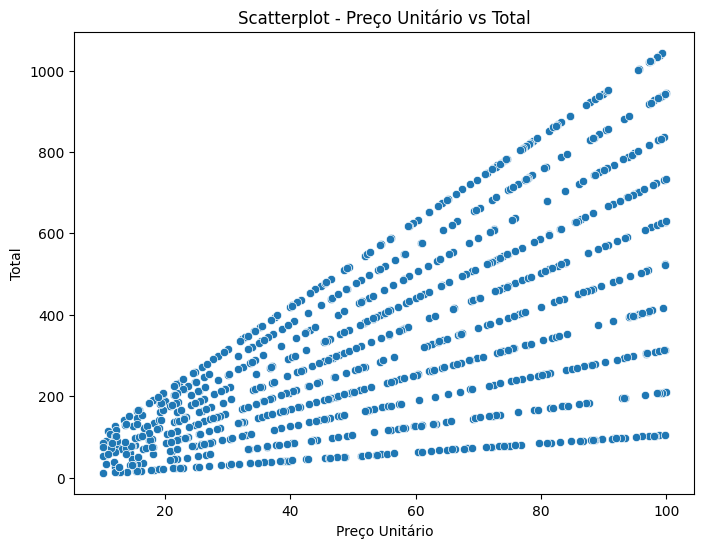

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Preço Unitário', y='Total')
plt.title('Scatterplot - Preço Unitário vs Total')
plt.xlabel('Preço Unitário')
plt.ylabel('Total')
plt.show()

No gráfico abaixo, o hexágono escuro no canto inferior esquerdo do gráfico hexbin indica uma região de alta densidade de pontos, ou seja, onde há uma grande concentração de observações. Isso sugere que existe uma quantidade significativa de pontos com valores baixos tanto de preço unitário quanto de total de vendas nessa região.

Já o gráfico de barras superior (horizontal) a distribuição de frequência é relativamente constante em relação ao preço unitário, indicando que, para essa faixa específica de valores. Por outro lado, o gráfico de barras vertical maior embaixo sugere que há uma maior quantidade de observações com valores baixos de total de vendas.

<Figure size 800x600 with 0 Axes>

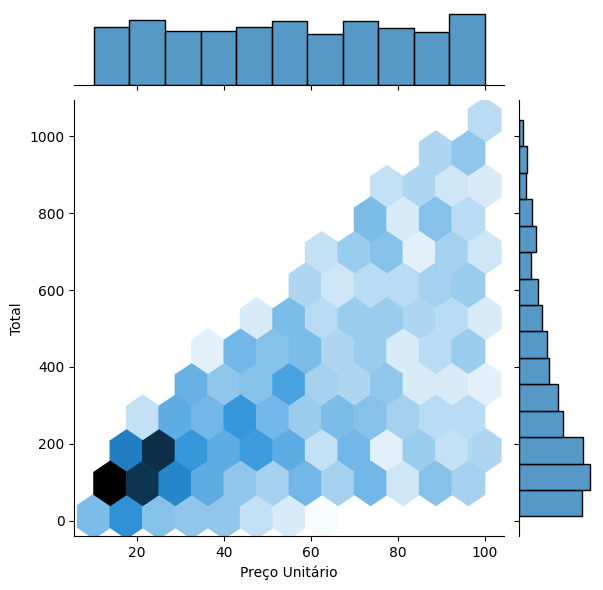

In [ ]:
plt.figure(figsize=(8, 6))
sns.jointplot(data=df, x='Preço Unitário', y='Total', kind='hex')
plt.xlabel('Preço Unitário')
plt.ylabel('Total')
plt.show()

Este gráfico de linhas mostra a evolução da quantidade de produtos vendidos ao longo do tempo. Podemos observar tendências temporais, como picos de vendas em datas específicas e quedas em outros momentos. Essas informações podem ser úteis para identificar padrões de consumo ao longo do tempo e planejar estratégias de estoque e marketing.

Por exemplo, na primeira quinzena de fevereiro percebe-se uma data em específico que atingiu uma quantidade alta de produtos vendidos, enquanto na segunda quinzena atingiu-se uma quantidade menor.

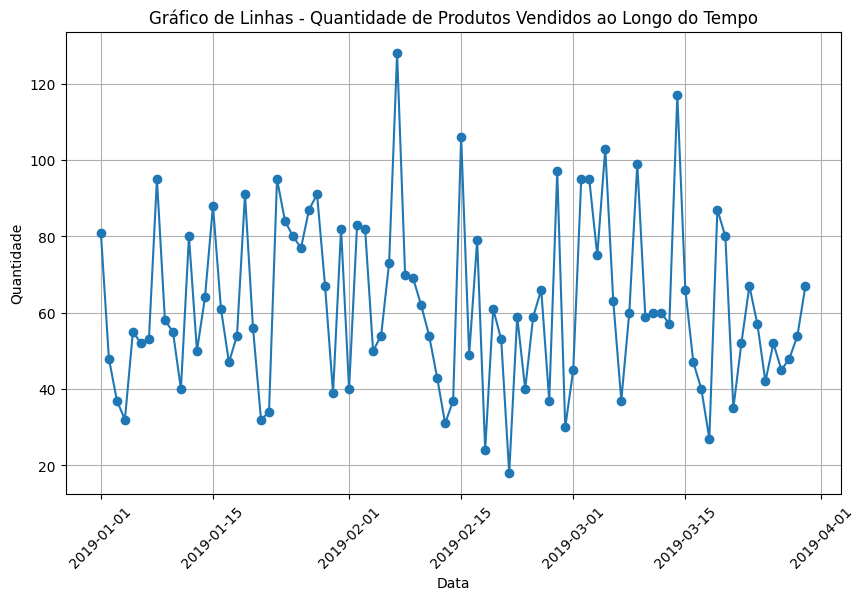

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])
df_time = df.groupby('Data')['Quantidade'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_time['Data'], df_time['Quantidade'], marker='o')
plt.title('Gráfico de Linhas - Quantidade de Produtos Vendidos ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

O gráfico boxplot abaixo exibe a distribuição do preço unitário dos produtos em cada filial. Ele mostra a mediana, quartis e possíveis outliers em cada distribuição. Podemos comparar a dispersão dos preços entre as filiais e identificar diferenças significativas na faixa de preços praticada em cada uma delas.

Percebe-se um preço unitário máximo maior na filial C (a do meio), e uma média também maior nessa filial, que pode ser motivada por diversos fatores, incluindo impostos e custos específicos do local, que podem causar um aumento do preço dos produtos.

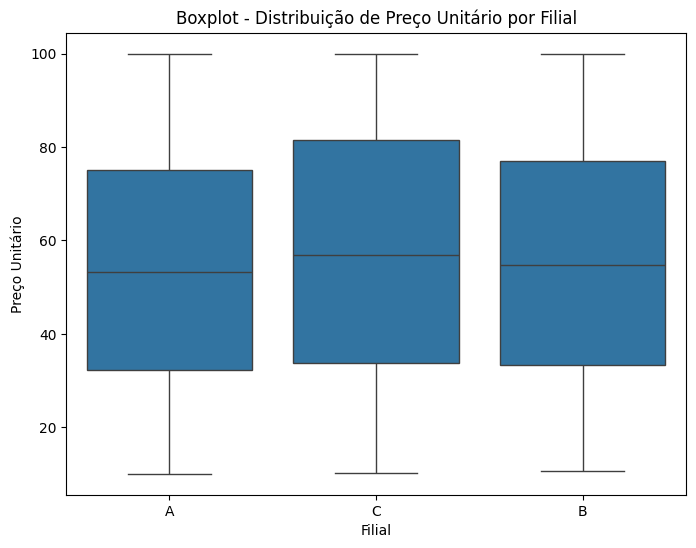

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Filial', y='Preço Unitário')
plt.title('Boxplot - Distribuição de Preço Unitário por Filial')
plt.xlabel('Filial')
plt.ylabel('Preço Unitário')
plt.show()

O gráfico de linha compara o número de compras por mês entre clientes "Member" e "Normal". Permite identificar tendências de compra ao longo do tempo e diferenças no comportamento entre os grupos.

É possível ver uma queda abrupta nas compras de clientes "normais" no segundo mês, que sempre se manteve acima dos clientes membros, o que acende um alerta do possível motivo dessa queda.

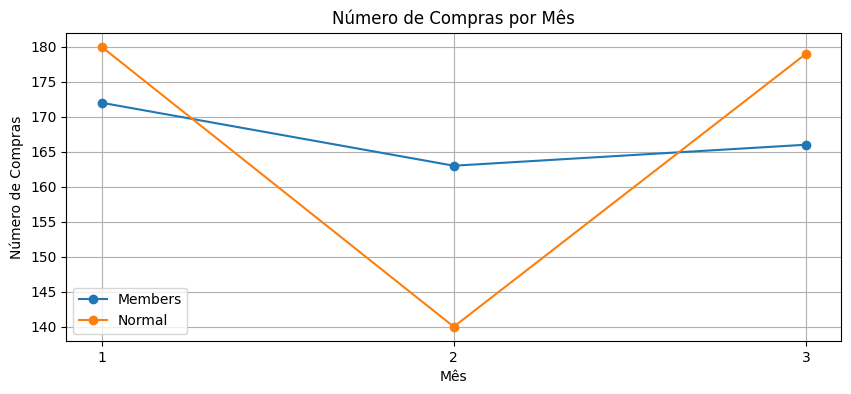

In [ ]:
df_members = df[df['Tipo Cliente'] == 'Member']
df_normal = df[df['Tipo Cliente'] == 'Normal']
df['Mês'] = df['Data Hora'].dt.month

compras_por_mes_members = df_members.groupby('Mês')['Tipo Cliente'].count()
compras_por_mes_normal = df_normal.groupby('Mês')['Tipo Cliente'].count()

df_compras_por_mes = pd.DataFrame({'Members': compras_por_mes_members, 'Normal': compras_por_mes_normal})

plt.figure(figsize=(10, 4))
plt.plot(df_compras_por_mes.index, df_compras_por_mes['Members'], marker='o', label='Members')
plt.plot(df_compras_por_mes.index, df_compras_por_mes['Normal'], marker='o', label='Normal')
plt.title('Número de Compras por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(df_compras_por_mes.index)
plt.legend()
plt.grid(True)
plt.show()

O histograma abaixo mostra a distribuição do total da venda, permitindo visualizar como os valores pagos estão distribuídos. Podemos identificar se os dados seguem uma distribuição normal.

Há uma maior frequência de valor total da venda estar entre 0 e 200, especificamente entre 50 e 100 dólares, descrescendo continuamente até o valor mais alto: 1000 dólares.

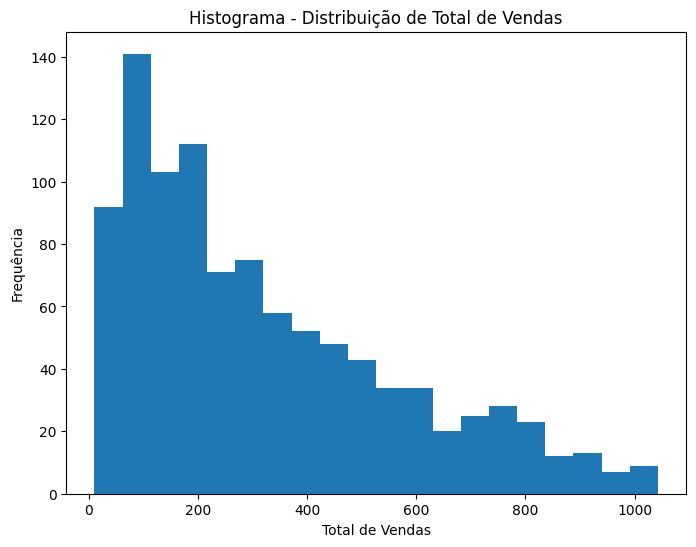

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Total'], bins=20)
plt.title('Histograma - Distribuição de Total de Vendas')
plt.xlabel('Total de Vendas')
plt.ylabel('Frequência')
plt.show()

## Conclusão

Após um tratamento dos dados da fonte, geramos vários gráficos que nos trouxeram insights interessantes sobre a base de dados e permitiram que tirássemos conclusões bastante interessantes.

Essas conclusões fornecem insights valiosos que podem ser utilizados pela equipe de gerenciamento do supermercado para tomar decisões informadas e estratégicas visando melhorar o desempenho e atender melhor às necessidades dos clientes e maximizar os lucros da empresa.

